# Experiments with synthetic data
**Aim: train model that works on realistic synthetic data**

Parameters to vary: 
- radius (0.5)
- proportion_hemispheres_lesional (0.3)
- proportion_features_abnormal (0.2)

Experiments:
- 3 layer network no smoothing of lesions (synth_3layer)
    - Baseline_nosmooth (radius 2, prop_lesional 0.9, prop_features 0.9)
    - Features_abnormal0.2_nosmooth (radius 2, prop_lesional 0.9, prop_features 0.2)
    - Radius0.5_nosmooth (radius 0.5, prop_lesional 0.9, prop_features 0.2)
- 3 layer network WITH smoothing (synth_3layer)
    - Baseline (radius 2, prop_lesional 0.9, prop_features 0.9)
    - prop_features0.2 (radius 2, prop_lesional 0.9, prop_features 0.2)
    - Radius0.5 (radius 0.5, prop_lesional 0.9, prop_features 0.2)
    - prop_lesional (radius 0.5, prop_lesional 0.3, prop_features 0.2)
    
- 3 layer network with real data (real_3layer)
    - from_scratch (no finetuning, with oversampling, all sites)
    
- Unet (synth_unet)
    - prop_features0.2 (radius 2, prop_lesional 0.9, prop_features 0.2)
    
Results:
- smoothing makes task a bit harder, but still tain-able

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
from meld_graph.paths import EXPERIMENT_PATH
import os
#import seaborn as sns
from meld_graph.experiment import Experiment, discover_trained_experiments

### define plotting fns

In [12]:
import collections

def flatten(d, parent_key='', sep='_'):
    items = []
    for k, v in d.items():
        new_key = parent_key + sep + k if parent_key else k
        if isinstance(v, collections.MutableMapping):
            items.extend(flatten(v, new_key, sep=sep).items())
        else:
            items.append((new_key, v))
    return dict(items)
            
def plot_scores(exps, score='loss', split='val', ax=None, title_prefix=''):
    # expects exps to be dict
    scores = []
    if ax is None:
        fig, ax = plt.subplots(1,1)
    for n, exp in sorted(exps.items(), key=lambda item: item[0]):
        scores = exp.get_scores(split=split)[score]
        ax.plot(scores.index, scores, label=n)
    ax.set_xlabel('epochs')
    ax.set_ylabel(score)
    ax.set_title(f'{title_prefix} {split} {score}')
    ax.legend()

### load data

In [19]:
model_base_paths = {
    # 3layer
    '3layer': '/rds/project/kw350/rds-kw350-meld/experiments_graph/co-spit1/22-08-22_synth_3layer'
}

# get list of trained experiments
model_paths = {}
for name, path in model_base_paths.items():
    model_paths[name] = discover_trained_experiments(path)
print(model_paths)

# process paths to get nice descriptive model names and load experiments
models_dict = {}
for name, exp_list in model_paths.items():
    name_dict = {}
    for path in exp_list:
        exp_name = path.split('/')[-2]
        if 'nosmooth' in exp_name:
            #filter out nosmooth experiments
            continue
        name_dict[exp_name] = Experiment.from_folder(path)
    models_dict[name] = name_dict
print(models_dict)

Initialised Experiment 22-08-22_synth_3layer/prop_features0.2
Initialised Experiment 22-08-22_synth_3layer/baseline


{'3layer': ['/rds/project/kw350/rds-kw350-meld/experiments_graph/co-spit1/22-08-22_synth_3layer/prop_features0.2/fold_00', '/rds/project/kw350/rds-kw350-meld/experiments_graph/co-spit1/22-08-22_synth_3layer/baseline/fold_00', '/rds/project/kw350/rds-kw350-meld/experiments_graph/co-spit1/22-08-22_synth_3layer/radius0.5_nosmooth/fold_00', '/rds/project/kw350/rds-kw350-meld/experiments_graph/co-spit1/22-08-22_synth_3layer/baseline_nosmooth/fold_00', '/rds/project/kw350/rds-kw350-meld/experiments_graph/co-spit1/22-08-22_synth_3layer/features_abnormal0.2_nosmooth/fold_00']}
{'3layer': {'prop_features0.2': <meld_graph.experiment.Experiment object at 0x149efea9f310>, 'baseline': <meld_graph.experiment.Experiment object at 0x149f3d46c070>}}


In [14]:
# available scores
#models_dict['3layer']['baseline_nosmooth'].get_scores(split='val')

## Plot data

### 3 layer model

/rds/project/kw350/rds-kw350-meld/experiments_graph/co-spit1/22-08-22_synth_3layer/baseline/fold_00
/rds/project/kw350/rds-kw350-meld/experiments_graph/co-spit1/22-08-22_synth_3layer/prop_features0.2/fold_00
/rds/project/kw350/rds-kw350-meld/experiments_graph/co-spit1/22-08-22_synth_3layer/baseline/fold_00
/rds/project/kw350/rds-kw350-meld/experiments_graph/co-spit1/22-08-22_synth_3layer/prop_features0.2/fold_00


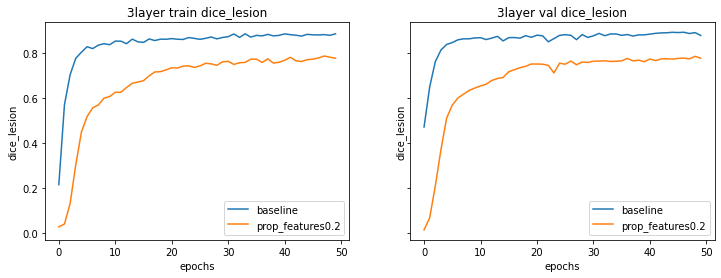

In [20]:
# linear model
fig, axes = plt.subplots(1,2, figsize=(12,4), sharey=True)
plot_scores(models_dict['3layer'], 'dice_lesion', split='train', ax=axes[0], title_prefix='3layer')
plot_scores(models_dict['3layer'], 'dice_lesion', split='val', ax=axes[1], title_prefix='3layer')
